In [8]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

In [9]:
df = pd.read_csv("../data/Engineered/BankChurners_Engineered_V2.csv")
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Card_Category_Platinum,Card_Category_Silver,Avg_Transaction_Value,Engagement_Score,Credit_Pressure,High_Credit_Flag,Tenure_Group,Trans_Freq_Group,High_Contact_Flag,Stability_Score
0,0,45,1,3,2.0,39,5,1,3,12691.0,...,0,0,27.238095,46,0.061224,1,1,0,1,1.4800
1,0,49,0,5,4.0,44,6,1,2,8256.0,...,0,0,39.121212,38,0.104651,1,1,0,0,2.6275
2,0,51,1,3,4.0,36,4,1,0,3418.0,...,0,0,94.350000,23,0.000000,0,1,0,0,2.4635
3,0,40,0,4,2.0,34,3,4,1,3313.0,...,0,0,58.550000,19,0.759734,0,1,0,0,1.8690
4,0,40,1,3,1.0,21,5,1,0,4716.0,...,0,0,29.142857,32,0.000000,1,0,0,0,2.3375


We look at the p-value:

| p-value      | Meaning                                           |
| ------------ | ------------------------------------------------- |
| **p < 0.05** |  Feature is **statistically affected by churn**  |
| **p ≥ 0.05** |  No significant difference (feature likely weak) |


## Why did we use a T-Test?

We used a **T-test** because:

* The feature is **numerical (continuous)**
* The target (`Attrition_Flag`) has **two groups**:

  * 0 → Existing customers
  * 1 → Churned customers
* We want to know:

>  *Is the **average value** of this feature different between churned and non-churned customers?*

In [10]:
churned = df[df['Attrition_Flag'] == 1]
existing = df[df['Attrition_Flag'] == 0]

##  Avg_Transaction_Value

### Why this feature?

* Measures **how much money the customer spends per transaction**
* Low spending → disengagement → churn risk

### Interpretation:

* **p < 0.05**
  -> Churned customers spend **significantly less per transaction**
* **p ≥ 0.05**
  -> Spending behavior is similar → weak churn signal

### Report sentence:

> “The independent t-test shows a statistically significant difference in average transaction value between churned and existing customers (p < 0.05), indicating that spending behavior is associated with customer attrition.”

---

In [11]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    churned['Avg_Transaction_Value'],
    existing['Avg_Transaction_Value'],
    equal_var=False
)

print("Avg Transaction Value")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Avg Transaction Value
T-statistic: 1.5821145837736301
P-value: 0.1137653946048938


##  Engagement_Score

### Why?

* Combines activity, relationships, and inactivity
* Represents **overall customer involvement**

### Interpretation:

* **Low engagement score + p < 0.05**
  -> Disengaged customers are more likely to churn

### Report sentence:

> “Engagement score differs significantly between churned and non-churned customers, confirming that lower engagement is associated with higher churn probability.”

---


In [12]:
t_stat, p_value = ttest_ind(
    churned['Engagement_Score'],
    existing['Engagement_Score'],
    equal_var=False
)

print("Engagement Score")
print("T-statistic:", t_stat)
print("P-value:", p_value)


Engagement Score
T-statistic: -56.61143429872478
P-value: 0.0


## Credit_Pressure

### Why?

* Measures **financial stress** (usage vs limit)

### Interpretation:

* **Higher pressure + p < 0.05**
  -> Financially stressed customers churn more

### Report sentence:

> “Credit pressure shows a statistically significant difference between churn groups, suggesting that customers closer to their credit limit are more likely to churn.”

---

In [13]:
t_stat, p_value = ttest_ind(
    churned['Credit_Pressure'],
    existing['Credit_Pressure'],
    equal_var=False
)

print("Credit Pressure")
print("T-statistic:", t_stat)
print("P-value:", p_value)


Credit Pressure
T-statistic: -18.62248292161567
P-value: 2.7950902931999413e-72


## Stability_Score

### Why?

* Measures **change in behavior**
* Sudden changes often precede churn

### Interpretation:

* **p < 0.05**
  -> Behavioral instability is linked to churn

---

In [14]:
t_stat, p_value = ttest_ind(
    churned['Stability_Score'],
    existing['Stability_Score'],
    equal_var=False
)

print("Stability Score")
print("T-statistic:", t_stat)
print("P-value:", p_value)


Stability Score
T-statistic: -26.96801595463437
P-value: 1.744069796168686e-139


# Chi-Square Test

### (Used for: High_Credit_Flag, High_Contact_Flag)

---

## Why did we use Chi-Square?

We used **Chi-square** because:

* Feature is **categorical / binary**
* Target is **categorical**
* We want to test **association**, not averages

>  *Is churn dependent on this category or not?*

---

##  Hypotheses

### Null Hypothesis (H₀):

> The feature and churn are **independent** (no relationship).

### Alternative Hypothesis (H₁):

> The feature and churn are **associated**.

---


## High_Credit_Flag

### Why?

* High-credit customers usually receive better benefits
* They behave differently from low-credit customers

### Interpretation:

* **p < 0.05**
  -> Churn depends on credit level
* **p ≥ 0.05**
  -> Credit level has no effect

### Report sentence:

> “The Chi-square test indicates a significant association between high credit limit customers and churn behavior (p < 0.05).”

---

In [15]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(
    df['High_Credit_Flag'],
    df['Attrition_Flag']
)

chi2, p, dof, expected = chi2_contingency(contingency)

print("High Credit Flag vs Churn")
print("Chi2:", chi2)
print("P-value:", p)


High Credit Flag vs Churn
Chi2: 9.38300578200016
P-value: 0.002190061638795325


## High_Contact_Flag

### Why?

* Many contacts = complaints or issues

### Interpretation:

* **p < 0.05**
  -> Customers with frequent contacts churn more

---

In [16]:
contingency = pd.crosstab(
    df['High_Contact_Flag'],
    df['Attrition_Flag']
)

chi2, p, dof, expected = chi2_contingency(contingency)

print("High Contact Flag vs Churn")
print("Chi2:", chi2)
print("P-value:", p)


High Contact Flag vs Churn
Chi2: 272.3064199561131
P-value: 3.566505055044487e-61


# ANOVA Test

### (Used for: Tenure_Group, Trans_Freq_Group)

---

##  Why did we use ANOVA?

We used **ANOVA** because:

* Feature has **more than 2 groups**
* Target is binary
* We want to compare churn behavior **across multiple groups**

>  *Does churn differ across customer groups?*

---

##  Hypotheses

### Null Hypothesis (H₀):

> All groups have **the same churn behavior**.

### Alternative Hypothesis (H₁):

> At least **one group differs** significantly.

---


## Tenure_Group

### Why?

* New, medium, loyal customers behave differently

### Interpretation:

* **p < 0.05**
  -> Churn rate changes with customer lifecycle

### Report sentence:

> “ANOVA results show that customer churn differs significantly across tenure groups, with newer customers exhibiting higher churn rates.”

---

In [17]:
from scipy.stats import f_oneway

groups = [
    df[df['Tenure_Group'] == g]['Attrition_Flag']
    for g in df['Tenure_Group'].unique()
]

f_stat, p_value = f_oneway(*groups)

print("Tenure Group vs Churn")
print("F-statistic:", f_stat)
print("P-value:", p_value)


Tenure Group vs Churn
F-statistic: 0.6408961505830906
P-value: 0.5268414749135739


## Trans_Freq_Group

### Why?

* Low transaction frequency is a strong churn signal

### Interpretation:

* **p < 0.05**
  -> Low-frequency users churn more

---

In [18]:
groups = [
    df[df['Trans_Freq_Group'] == g]['Attrition_Flag']
    for g in df['Trans_Freq_Group'].unique()
]

f_stat, p_value = f_oneway(*groups)

print("Transaction Frequency Group vs Churn")
print("F-statistic:", f_stat)
print("P-value:", p_value)


Transaction Frequency Group vs Churn
F-statistic: 1141.1763874581525
P-value: 0.0


In [22]:
corr_features = [
    'Avg_Transaction_Value',
        'Engagement_Score',
        'Credit_Pressure',
        'Stability_Score',
        'High_Credit_Flag',
        'High_Contact_Flag'
]


In [23]:
correlation_matrix = df[corr_features].corr()

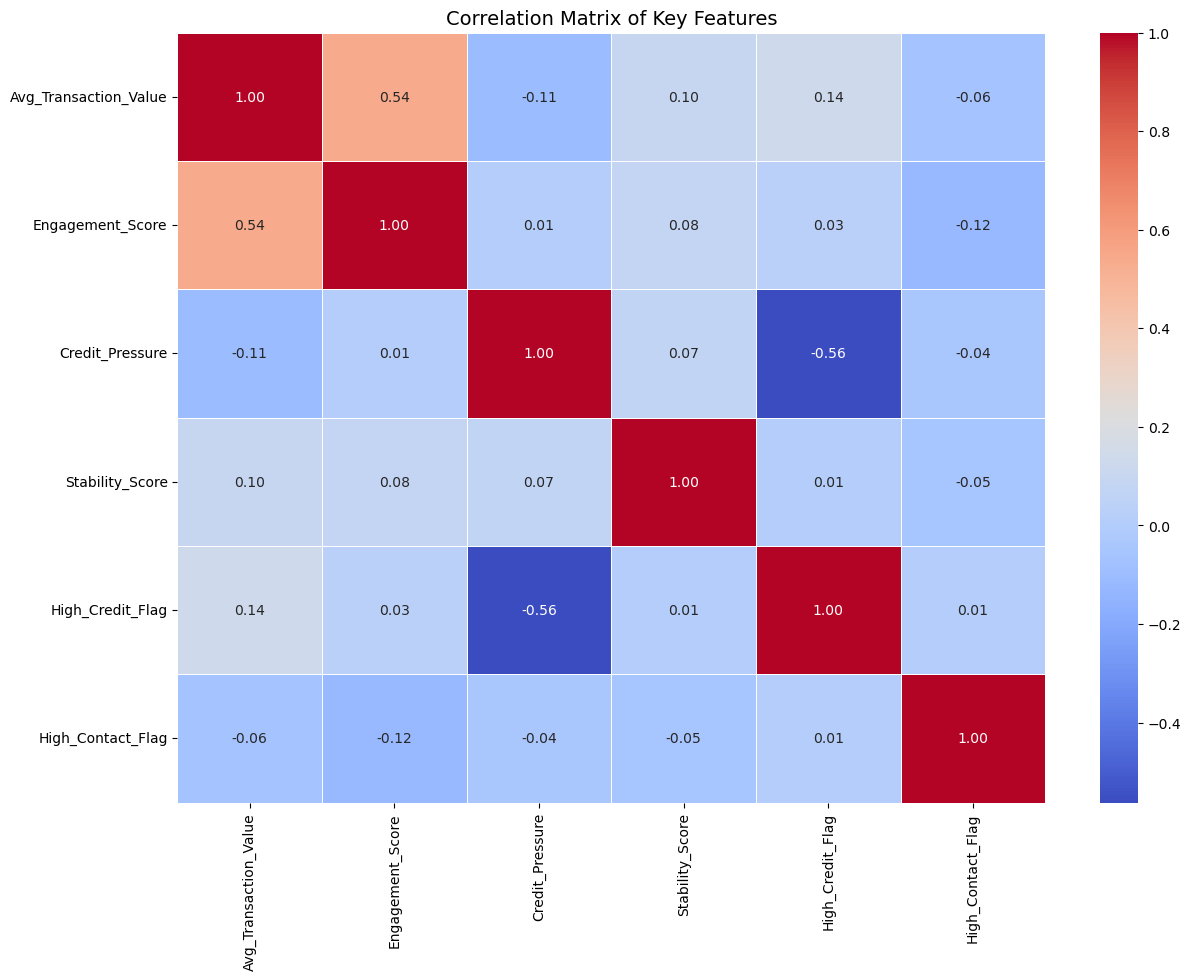

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix of Key Features", fontsize=14)
plt.show()
